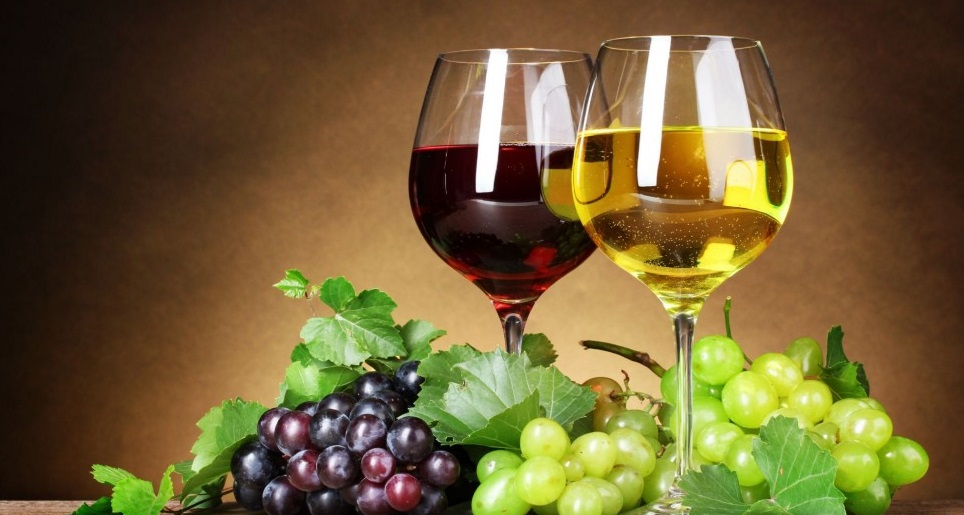

# BUSINESS UNDERSTANDING

In [1]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [2]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [3]:
# Classificação de binhos tinto e branco

# Head

In [4]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [5]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

14/11/2023  12:16    <DIR>          .
29/10/2023  16:48    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
03/11/2023  22:07    <DIR>          .ipynb_checkpoints
14/11/2023  12:16           989.973 CLASSIFICA€ÇO_vinhos_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
07/11/2023  16:35         9.618.537 wine_classifier_etc_2023-11-07.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.125.686 bytes
               3 pasta(s)   896.615.837.696 bytes dispon¡veis


# Library installation

In [6]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install pyod

# Import libs

In [119]:
import sklearn

from datetime import datetime

# principais bibliotecas para lidar com dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# função para gerar o MODELO de machine learning
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# função para tratar os dados com rede neural
from sklearn.neural_network import MLPClassifier

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# função para MÉTRICA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# função para VALIDAÇÃO do modelo
from sklearn.model_selection import train_test_split as tts

# balancemaneto dos dados em relação ao MAIOR valor de y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# biblioteca para persistir o modelo
import joblib

# identificar outliers
from pyod.models.knn import KNN

# Gráfico da Árvore
from sklearn.tree import plot_tree

In [8]:
sklearn.__version__

'1.3.0'

# Load data

In [9]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

# Exploratory Analysis

In [10]:
df.sample(15).T

1562     6362     5206    2948    2024    3466  \
fixed_acidity             7.2      5.3      6.8     9.2     7.0     6.9   
volatile_acidity        0.695      0.4     0.14    0.35    0.21    0.37   
citric_acid              0.13     0.25     0.18    0.39    0.28    0.28   
residual_sugar            2.0      3.9      1.4     0.9     8.7    13.8   
chlorides               0.076    0.031    0.047   0.042   0.045   0.031   
free_sulfur_dioxide      12.0     45.0     30.0    15.0    37.0    34.0   
total_sulfur_dioxide     20.0    130.0     90.0    61.0   222.0   137.0   
density               0.99546  0.99072  0.99164  0.9924  0.9954  0.9948   
pH                       3.29     3.31     3.27    2.96    3.25     3.1   
sulphates                0.54     0.58     0.54    0.28    0.54    0.37   
alcohol                  10.1    11.75     11.2    10.4    10.4    11.6   
quality                     5        7        6       4       6       6   
style                     red    white    white   white   white   white   

                         4589     4168    3016    16       4143     6014  \
fixed_acidity             5.0      6.6     8.6     8.5      6.9      6.3   
volatile_acidity         0.27     0.24    0.55    0.28     0.32    0.305   
citric_acid              0.32     0.24    0.35    0.56      0.3     0.22   
residual_sugar            4.5      8.6   15.55     1.8      1.8     16.0   
chlorides               0.032    0.034   0.057   0.092    0.036    0.061   
free_sulfur_dioxide      58.0     25.0    35.5    35.0     28.0     26.0   
total_sulfur_dioxide    178.0    135.0   366.5   103.0    117.0    141.0   
density               0.98956  0.99582  1.0001  0.9969  0.99269  0.99824   
pH                       3.45     3.33    3.04     3.3     3.24     3.08   
sulphates                0.31     0.59    0.63    0.75     0.48      0.5   
alcohol                  12.6     10.3    11.0    10.5     11.0      9.1   
quality                     7        6       3       7        6        5   
style                   white    white   white     red    white    white   

                         831      5931     5457  
fixed_acidity             5.9      7.3      6.1  
volatile_acidity         0.61     0.19     0.21  
citric_acid              0.08     0.27      0.3  
residual_sugar            2.1     13.9      6.3  
chlorides               0.071    0.057    0.039  
free_sulfur_dioxide      16.0     45.0     47.0  
total_sulfur_dioxide     24.0    155.0    136.0  
density               0.99376  0.99807  0.99068  
pH                       3.56     2.94     3.27  
sulphates                0.77     0.41     0.31  
alcohol                  11.1      8.8     12.7  
quality                     6        8        6  
style                     red    white    white

In [11]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [14]:
df.shape

(6497, 13)

In [15]:
df.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [16]:
# verificar a existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [17]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [18]:
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

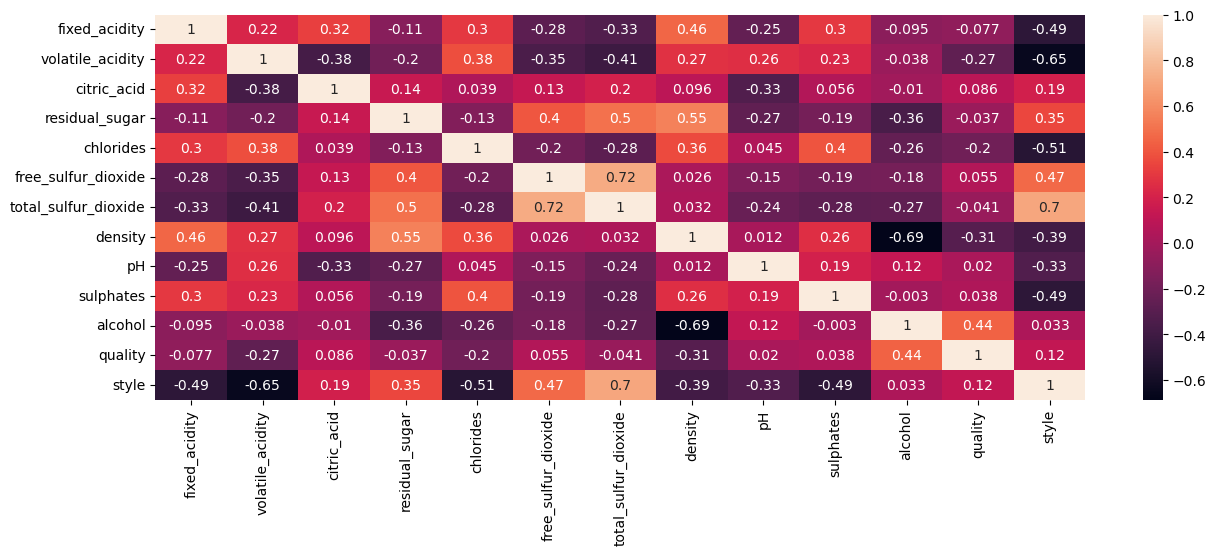

In [19]:
# Analisar a correlação entre as variáveis da base de dados
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

In [20]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

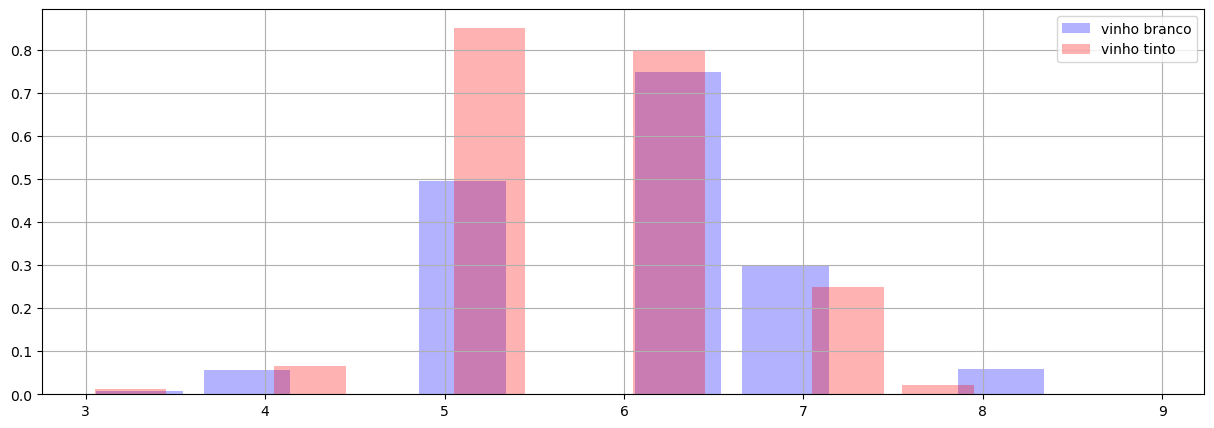

In [21]:
# ANALISANDO a qualidade geral dos vinhos em relação a característica tinto e branco
# (df.loc[df['style']== 1]).hist(figsize=(15,5));
# df['quality'].hist()

# min = df['quality'].min()
# max = df['quality'].max()
# bins = np.linspace(min,max, 6)

plt.figure(figsize=(15,5))
(df['quality'].loc[df['style']== 1]).hist(rwidth=0.80, color='b', alpha=.3, density=True, label='vinho branco') # vinhos branco
(df['quality'].loc[df['style']== 0]).hist(rwidth=0.80, color='r', alpha=.3, density=True, label='vinho tinto') # vinhos tinto;
plt.legend();

# Análise dos outliers (df)

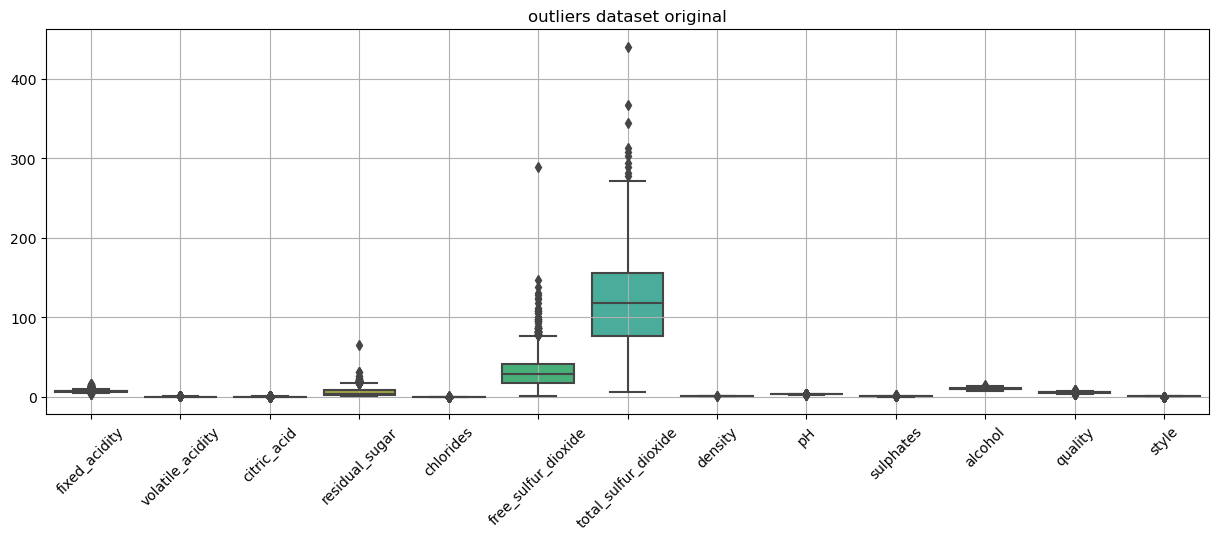

In [22]:
# Outliers data frame df
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('outliers dataset original')
plt.grid()
plt.show();

In [23]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT DE VARIÁVEL ESPECÍFICA
var = 'total_sulfur_dioxide'
q1 = df[var].quantile(0.25)
q2 = df[var].quantile(0.5)
q3 = df[var].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)
menor_valor_serie = df[var].min()
maior_valor_serie = df[var].max()
quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
perc_ALS = (((df.loc[df[var] > limite_superior]).count()[0] / df[var].count())) * 100
perc_BLI = (((df.loc[df[var] < limite_inferior]).count()[0] / df[var].count())) * 100
box_splot = {
        'perc_BLI':[perc_BLI],
        'quant_dados_BLS':[quant_dados_BLI],
        'menor_valor_serie':[menor_valor_serie],
        'LI_box_splot':[limite_inferior],
        'q1':[q1],
        'q2':[q2],
        'q3':[q3],
        'LS_box_splot':[limite_superior],
        'maior_valor_serie':[maior_valor_serie],
        'quant_dados_ALS':[quant_dados_ALS],
        'perc_ALS':[perc_ALS]        
}
df_box_splot = pd.DataFrame(box_splot)
df_box_splot

perc_BLI  quant_dados_BLS  menor_valor_serie  LI_box_splot    q1     q2  \
0       0.0                0                6.0         -41.5  77.0  118.0   

      q3  LS_box_splot  maior_valor_serie  quant_dados_ALS  perc_ALS  
0  156.0         274.5              440.0               10  0.153917

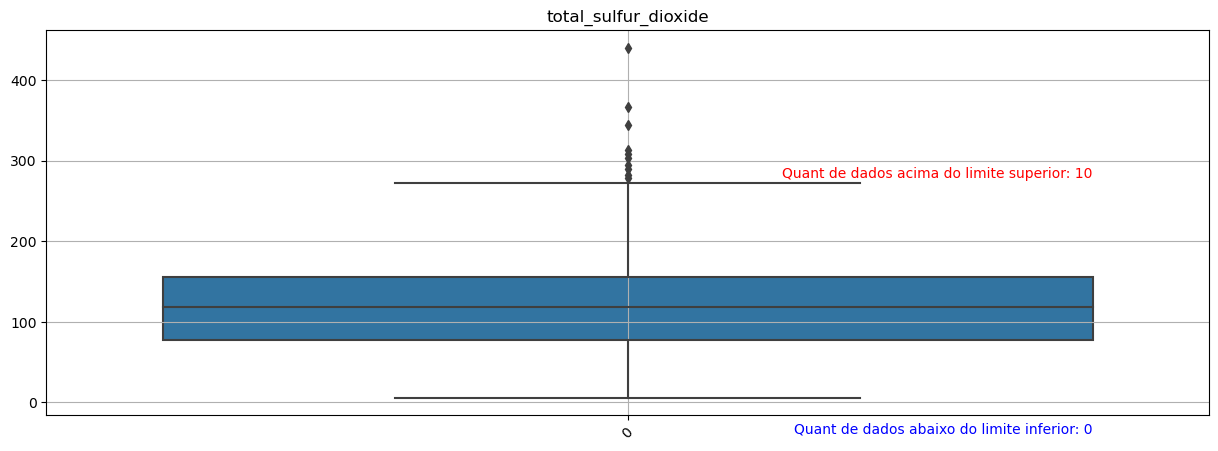

In [24]:
# Outliers var
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(var)
plt.text(0.4, limite_superior, f"Quant de dados acima do limite superior: {quant_dados_ALS}", ha='right',
         va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"Quant de dados abaixo do limite inferior: {quant_dados_BLI}", ha='right',
         va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

In [25]:
# Outliers acima do limite superior boxsplot var
df.loc[df[var] > limite_superior]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1079            7.9              0.30         0.68            8.30      0.050   
1081            7.9              0.30         0.68            8.30      0.050   
1924            7.5              0.27         0.31            5.80      0.057   
3016            8.6              0.55         0.35           15.55      0.057   
3530            7.1              0.49         0.22            2.00      0.047   
3726            9.1              0.33         0.38            1.70      0.062   
3977            9.4              0.23         0.56           16.45      0.063   
4253            6.9              0.40         0.22            5.95      0.081   
4751            7.6              0.25         1.23            4.60      0.035   
6344            6.1              0.26         0.25            2.90      0.047   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1924                131.0                 313.0  0.99460  3.18       0.59   
3016                 35.5                 366.5  1.00010  3.04       0.63   
3530                146.5                 307.5  0.99240  3.24       0.37   
3726                 50.5                 344.0  0.99580  3.10       0.70   
3977                 52.5                 282.0  1.00098  3.10       0.51   
4253                 76.0                 303.0  0.99705  3.40       0.57   
4751                 51.0                 294.0  0.99018  3.03       0.43   
6344                289.0                 440.0  0.99314  3.44       0.64   

      alcohol  quality  style  
1079     12.3        7      0  
1081     12.3        7      0  
1924     10.5        5      1  
3016     11.0        3      1  
3530     11.0        3      1  
3726      9.5        5      1  
3977      9.3        5      1  
4253      9.4        5      1  
4751     13.1        6      1  
6344     10.5        3      1

In [26]:
# Instanciando o objeto KNN para detectar os outlers df
# Obs: um das formas de tratar outliers mas que não é a mais adequada ou a certa, pois depende do contexto dos dados
detector = KNN()

# Treinar o detector de OUTLIERS
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [27]:
# 0 -> NÃO é outlier
# 1 -> outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([5847,  650], dtype=int64))

In [29]:
# Cálculo da distância realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([2.12212299, 2.71635787, 2.18040046, ..., 2.34466423, 3.08154044,
       2.51754346])

In [30]:
# Lista outliers
outliers = []
for i in range(len(previsoes)):    
    if previsoes[i] == 1:
        outliers.append(i)

# Filtrar as linhas outlier df
df_outliers = df.iloc[outliers,:]

In [31]:
# salvar versão df sem os outliers
df_sem_outliers = df.loc[~df.index.isin(outliers)]

In [32]:
# df_sem_outliers

In [33]:
df.shape, df_sem_outliers.shape

((6497, 13), (5847, 13))

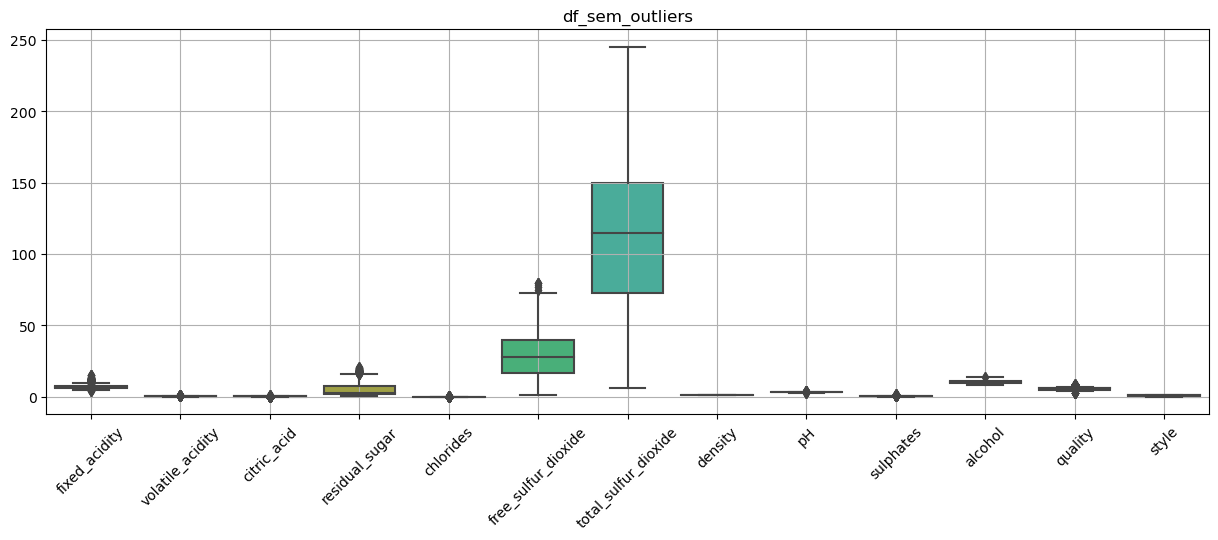

In [34]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('df_sem_outliers')
plt.grid()
plt.show();

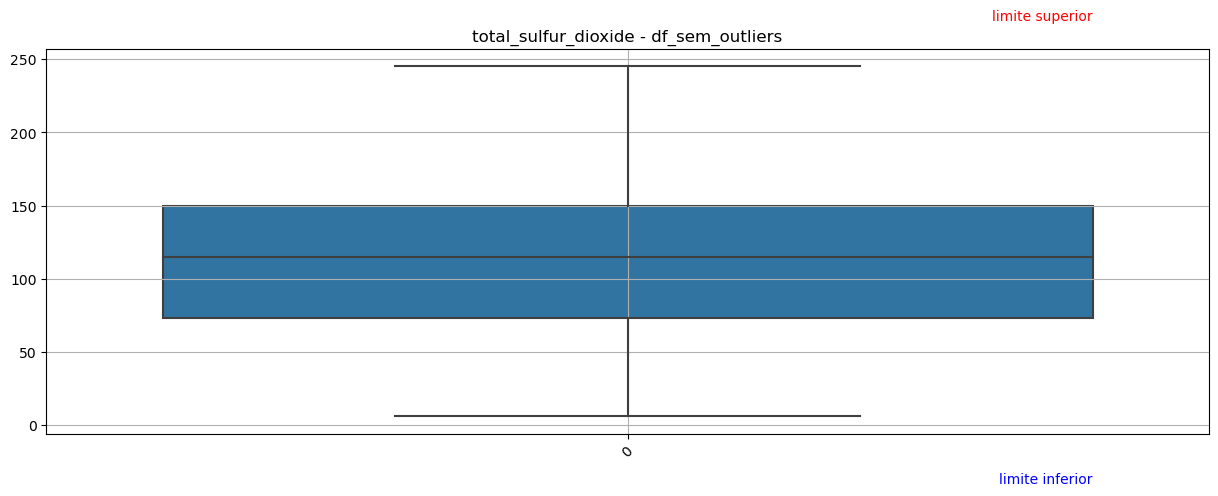

In [35]:
# Análise variável após tratamento dos outliers
var = 'total_sulfur_dioxide'
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'{var} - df_sem_outliers')
plt.text(0.4, limite_superior, f"limite superior", ha='right', va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"limite inferior", ha='right', va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [36]:
# dividir em df MODEL para treinar e testar o modelo e df VALIDAÇÃO para fins de simulando o mundo real
df_model, df_validation = tts(df, test_size=0.3)

In [37]:
# Divisão dos dados em X e y a partir do df_tr (corresponde a 70% da base utilizada para treinar o modelo)
X = df_model.drop('style', axis = 1)
y = df_model['style']
X.shape, y.shape

((4547, 12), (4547,))

In [38]:
# Variável de validação final para o modelo gerado (corresponde a 30% dos dados simulando mundo real)
X_val = df_validation.drop('style', axis = 1)
y_val = df_validation['style']

In [39]:
# df.groupby('style').size()[0], df.groupby('style').size()[1]

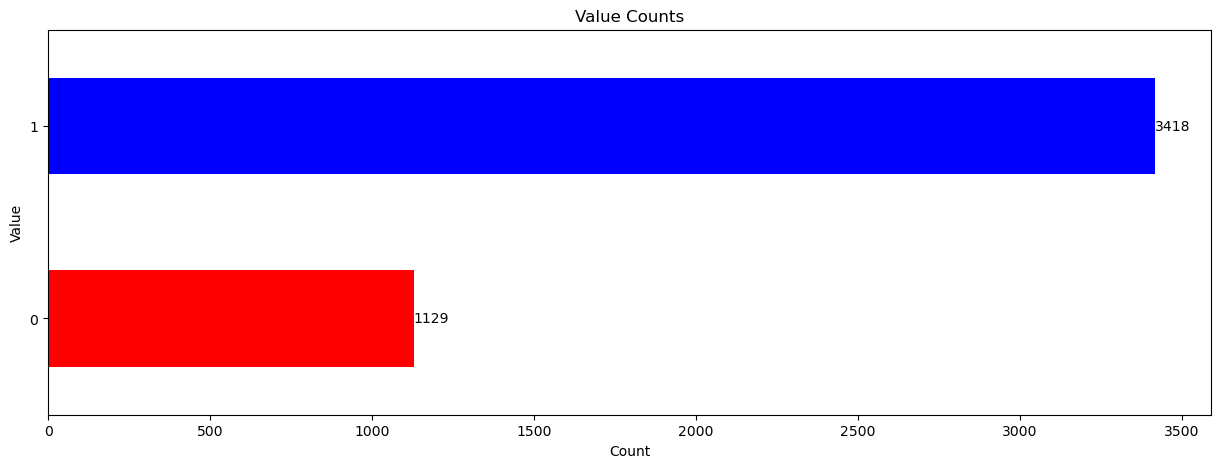

In [40]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [41]:
# quantidade de 0 e 1 na variável y do df
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1129, 3418], dtype=int64))

In [42]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(24.8295579502969, 75.1704420497031)

# Data balancing

In [43]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [44]:
# y_bal.value_counts()

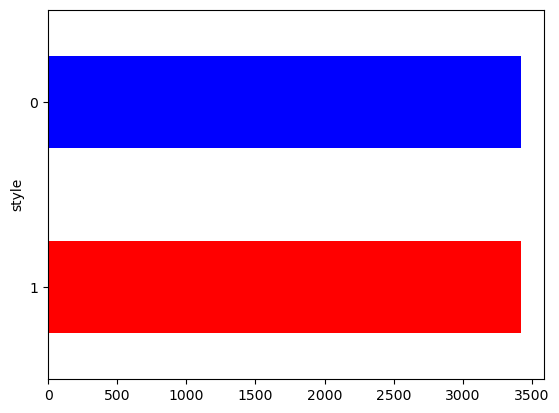

In [45]:
# variável y, balanceada, utilizada para TREINAR o modelo
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

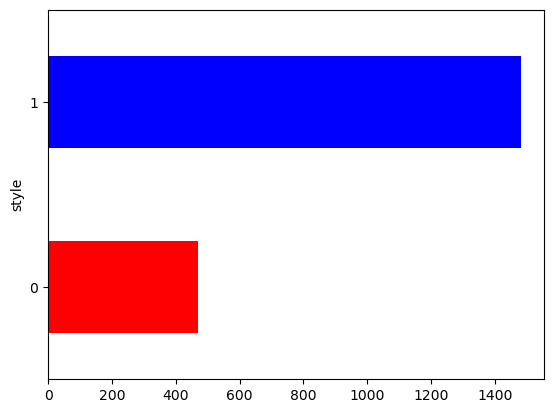

In [46]:
# Variável y, base de validação, utilizada para aplicar situações novas ao modelo já treinado e simulando vida real
y_val.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [47]:
# Padronizar X_bal do X do df_tr
obj_padronizado = StandardScaler().fit(X_bal)
X_bal_padronizado = obj_padronizado.transform(X_bal)
X_bal_padronizado = pd.DataFrame(X_bal_padronizado)
X_bal_padronizado.columns = list(X_bal.columns)

In [48]:
X_bal_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6831       0.157917          0.218887     0.662106       -0.525829   0.450366   
6832       0.386839         -0.692867     0.259176       -0.664633  -0.200601   
6833       1.170144          0.207634     0.863907       -0.397303   0.928425   
6834       0.376827          0.792809    -0.971897       -0.530664   0.479700   
6835       3.257816         -0.171786     1.921665       -0.606151   0.345555   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
6831            -0.182513             -0.335032  0.462801  0.414339   
6832            -0.335854             -0.910429 -0.160491  0.064187   
6833             0.870505              0.856582  0.933799 -0.263699   
6834            -0.379490             -0.561288  0.893901  0.829745   
6835            -1.135134             -1.063515  0.974598 -1.883554   

      sulphates   alcohol   quality  
6831   0.829770 -0.424326 -0.802318  
6832   0.016349  0.373964  0.389996  
6833   0.332266 -0.975487 -0.802318  
6834  -0.132675 -0.566771 -0.802318  
6835   1.191702 -0.505131  1.582310

In [49]:
# df_padronizado.describe().T

In [50]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_padronizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [51]:
# Padronizar X_val (origem no df_ts correspondente a 30% dos dados do df para teste do modelo)
obj_padronizado = StandardScaler().fit(X_val)
X_val_padronizado = obj_padronizado.transform(X_val)
X_val_padronizado = pd.DataFrame(X_val_padronizado)
X_val_padronizado.columns = list(X_val.columns)
X_val_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1945      -0.821507          0.250858    -1.250528       -0.336150   0.130037   
1946      -0.372502         -0.478344     1.185010        0.554652  -0.101615   
1947       0.750012         -0.842944     0.419555       -0.420988  -0.072658   
1948       0.824846         -0.478344     0.697902       -0.739131   0.709166   
1949       0.226172         -0.660644     0.280381        0.321347  -0.564919   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
1945            -0.204055             -0.057132 -0.407615 -0.932111   
1946             0.996010              1.441634  0.305892 -0.175034   
1947             0.595988              1.031257 -0.534312  0.014236   
1948            -1.118390             -1.591584  0.912707 -0.048854   
1949             0.710280              0.799306 -0.287585 -1.121380   

      sulphates   alcohol   quality  
1945  -1.277569 -1.080116 -2.099711  
1946  -0.336761 -0.831218 -0.960786  
1947  -0.807165  0.911064 -0.960786  
1948   1.813658 -0.914184  0.178140  
1949  -1.411971  0.413269 -0.960786

# Normalization

In [52]:
# obj_normalizado = MinMaxScaler().fit(X_bal)
# df_normalizado = obj_normalizado.transform(X_bal)
# df_normalizado = pd.DataFrame(df_normalizado)
# df_normalizado.columns = list(X_bal.columns)
# df_normalizado.head()

In [53]:
# df_normalizado.describe().T

In [54]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_normalizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

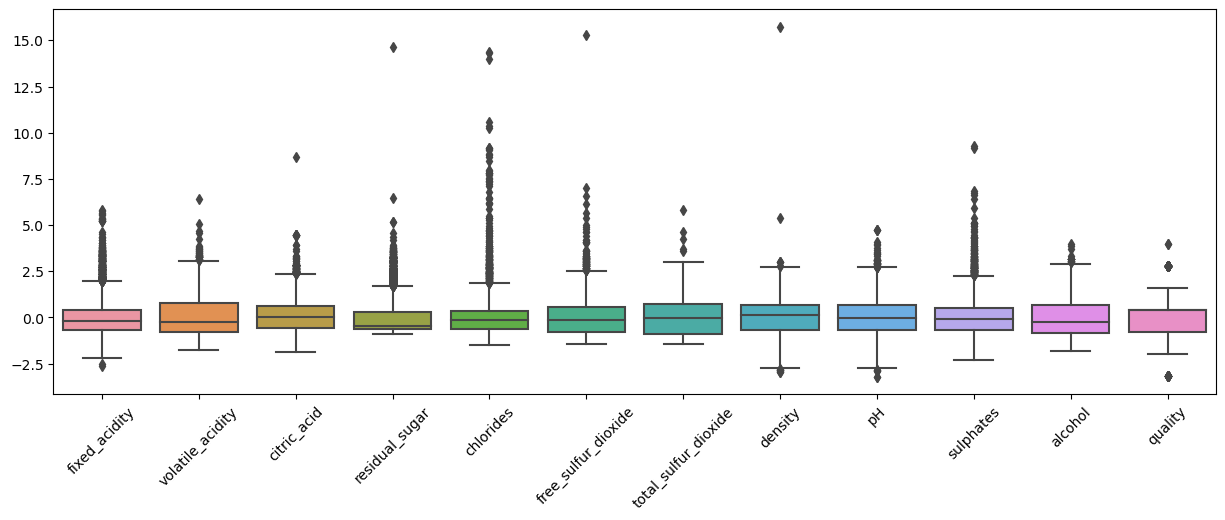

In [55]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_bal_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts

In [56]:
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts
PREDICTOR = X_bal_padronizado
TARGET = y_bal
X_tr, X_ts, y_tr, y_ts = tts(PREDICTOR,TARGET, test_size= 0.3)

In [57]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((4785, 12), (2051, 12), (4785,), (2051,), 2409, 2376)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

[ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [58]:
# Treinar o modelo
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)
etc_y_pred = etc.predict(X_ts)

In [59]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
# etc.predict_proba(X_ts)

In [60]:
# pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

# EVALUATION

In [61]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [62]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9980178394449951

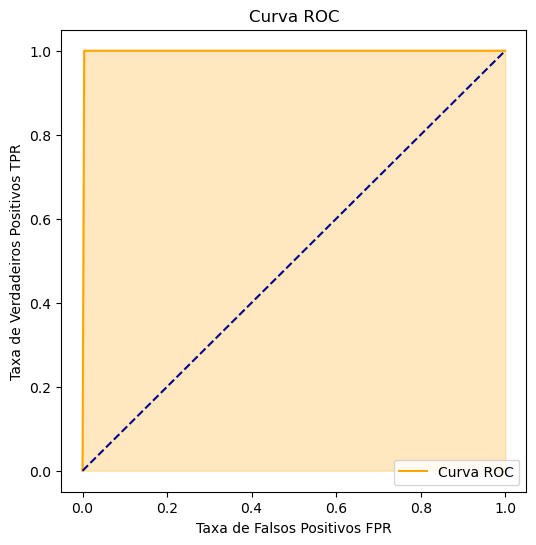

AUC: 1.00


In [63]:
# Calculando a curva ROC
# A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR)
# em função da taxa de falsos positivos (FPR) para diferentes valores de limiar de classificação.

fpr, tpr, thresholds = roc_curve(y_ts, etc_y_pred)

# Plotando a curva ROC
color = 'orange'
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color, label='Curva ROC')
plt.fill_between(fpr, tpr, color=color, alpha=.25)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos FPR')
plt.ylabel('Taxa de Verdadeiros Positivos TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calculando a área sob a curva (AUC)
# A área sob a curva ROC (AUC-ROC) é uma métrica resumida que quantifica o desempenho global do modelo.
# Um valor de AUC-ROC próximo a 1 indica um bom modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

In [64]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9980497318381277


In [65]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9980497318381277


In [66]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
etc_precision = precision_score(y_ts, etc_y_pred)
print("precision_score:", etc_precision)

precision_score: 0.9961759082217974


In [67]:
# RECALL
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
etc_recall = recall_score(y_ts, etc_y_pred)
print("etc_recall:", etc_recall)

etc_recall: 1.0


In [68]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1005,    4],
       [   0, 1042]], dtype=int64)

|                     |  PRED = 0          |           PRED = 1   |
|-                    |--------------------|----------------------|
| *REAL = 0*          |      VN            |             FP       |
| *REAL = 1*          |      FN            |             VP       |

In [69]:
# CÁLCULO MANUAL DA ACURÁCIA
# com base nos valores da matriz confusão
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9980497318381277


In [70]:
# print(classification_report(y_ts, etc_y_pred))

In [71]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9980842911877394

In [72]:
# X_ts[400:410].T
X_val_padronizado[400:410].T

400       401       402       403       404  \
fixed_acidity        -1.495015 -0.147999  1.648022  1.199017 -1.495015   
volatile_acidity     -0.599877 -0.174510 -0.417577 -0.417577  1.861177   
citric_acid          -1.180941  1.393770  1.463357  0.976249 -2.224743   
residual_sugar        0.342556 -0.802760 -0.654293 -0.717922 -0.707317   
chlorides            -0.362223 -0.767614  0.535428  1.143514  0.709166   
free_sulfur_dioxide   0.081675 -1.461266 -1.404120 -0.604077 -0.889806   
total_sulfur_dioxide  0.317559 -0.984940 -1.752166 -1.555899 -1.573741   
density              -0.294254 -0.954414  0.512609  0.072502 -0.074200   
pH                    0.140415 -0.932111 -0.111944  0.266595  3.547262   
sulphates            -0.336761 -0.672764  4.031277  0.200844  0.536847   
alcohol              -0.499355 -0.084526  1.242927  0.662166  1.657756   
quality               0.178140 -0.960786  1.317065  0.178140  0.178140   

                           405       406       407       408       409  
fixed_acidity         2.695701 -0.597004 -1.120844  1.573188  0.226172  
volatile_acidity     -0.296043 -1.298695 -0.964478  2.651146  0.919292  
citric_acid           0.697902  0.280381  0.280381 -0.345900 -0.833007  
residual_sugar       -0.823970 -0.866389 -0.908808 -0.569455 -0.611874  
chlorides             0.824992 -0.333267 -0.275354  0.651253  8.006199  
free_sulfur_dioxide  -0.661223 -0.489785 -1.232682 -0.375493 -1.289828  
total_sulfur_dioxide -1.591584 -0.860043 -0.806516 -1.074153 -1.823536  
density               0.262548 -1.507882 -0.891065  1.246121  0.712658  
pH                    0.392774 -0.427393  3.042544  0.582043 -0.048854  
sulphates             1.343254 -0.202360  1.007251  0.940050  2.485664  
alcohol               1.159961  0.994030  0.330303  0.081406 -0.001560  
quality               0.178140  1.317065  1.317065  0.178140  0.178140

# Testar o modelo com dados da base df_validation

In [73]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
validation = list(y_val[400:440].values)
print (validation, end=' ')

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] 

In [74]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(etc.predict(X_val_padronizado[400:440]))
# prediction = list(etc.predict(X_ts[400:410]))
print(prediction, end=' ')

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1] 

In [75]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])    
    display (dfp)
#     display (dfp.prediction.value_counts())
else:
    print(f'O modelo previu corretamente todos os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

seq  validation  prediction
0   33           1           0

# VISUAL

In [76]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [77]:
pred.min(), pred.max()

(0.006196165982450682, 0.9959218621975303)

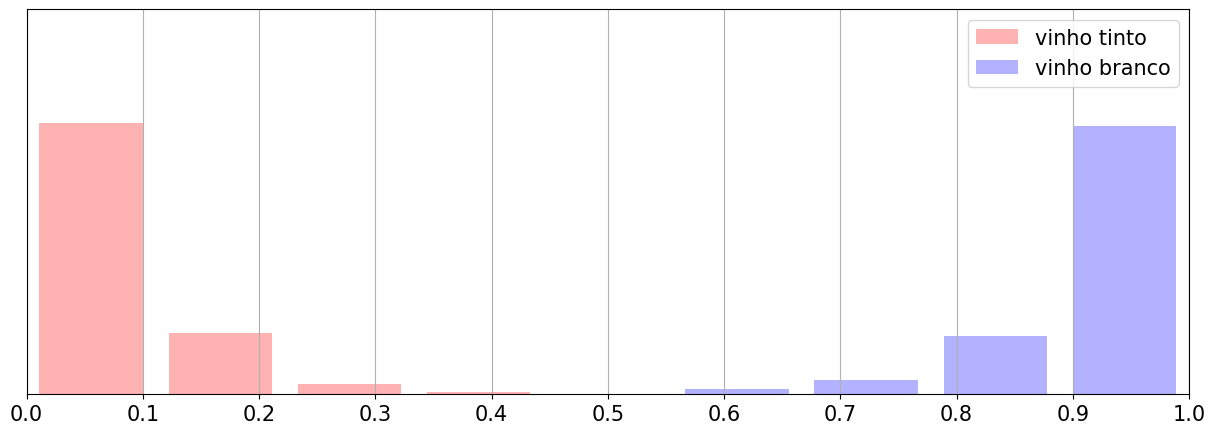

In [78]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [79]:
# Salvar modelo em arquivo
# current_date = datetime.today().strftime('%Y-%m-%d')
# name = "wine_classifier_etc_"
# file_name = f'{name}{current_date}.joblib'
# file_path = fr'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\{file_name}'
# joblib.dump(etc, file_path)

In [80]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

In [81]:
# Criar tela no Streamlit para aplciar o modelo em situação de produção
# receber arquivo com dados em upload e retornar resultado na tela com tipo de vinho

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [82]:
# Treinar o modelo
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [83]:
neigh_y_pred = neigh.predict(X_ts)

In [84]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1006,    3],
       [  12, 1030]], dtype=int64)

In [85]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("Acurácia:", neigh_acuracia)

Acurácia: 0.9926864943929791


In [86]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1009
           1       1.00      0.99      0.99      1042

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [87]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9927710843373494

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# VALIDAÇÃO CRUZADA

In [88]:
params = {
    'max_leaf_nodes': np.power(2, (np.arange(1, 12, 1))),
    'criterion': ['gini','entropy']
}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
    verbose=5,
)

In [89]:
print(grid)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)


In [90]:
# Treinar o modelo
# dtc = DecisionTreeClassifier()
# dtc.fit(X_tr, y_tr)
grid.fit(X_tr, y_tr)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=2;, score=0.921 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=2;, score=0.917 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=2;, score=0.910 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=2;, score=0.921 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=2;, score=0.944 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=2;, score=0.914 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=2;, score=0.927 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=2;, score=0.946 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=2;, score=0.916 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2;, score=0.916 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.970 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 4/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=2048;, score=0.992 total time=   0.0s
[CV 8/10] END criterion=gini, max_leaf_nodes=2048;, score=0.996 total time=   0.0s
[CV 9/10] END criterion=gini, max_leaf_nodes=2048;, score=0.994 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2048;, score=0.992 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2;, score=0.921 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2;, score=0.917 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2;, score=0.910 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=2;, score=0.921 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=2;, score=0.944 total time=   0.0s
[CV

[CV 4/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.992 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.998 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.992 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.996 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.983 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.981 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.990 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.992 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=2048;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)

In [91]:
grid.best_params_, grid.best_score_, grid.best_estimator_

({'criterion': 'entropy', 'max_leaf_nodes': 16},
 0.9948386464728232,
 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16))

In [92]:
dtc_y_predct_proba = grid.predict_proba(X_ts)[:,1]

In [93]:
dtc_y_predct_proba

array([1., 0., 0., ..., 0., 1., 1.])

In [94]:
# dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred = grid.predict(X_ts)
dtc_y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

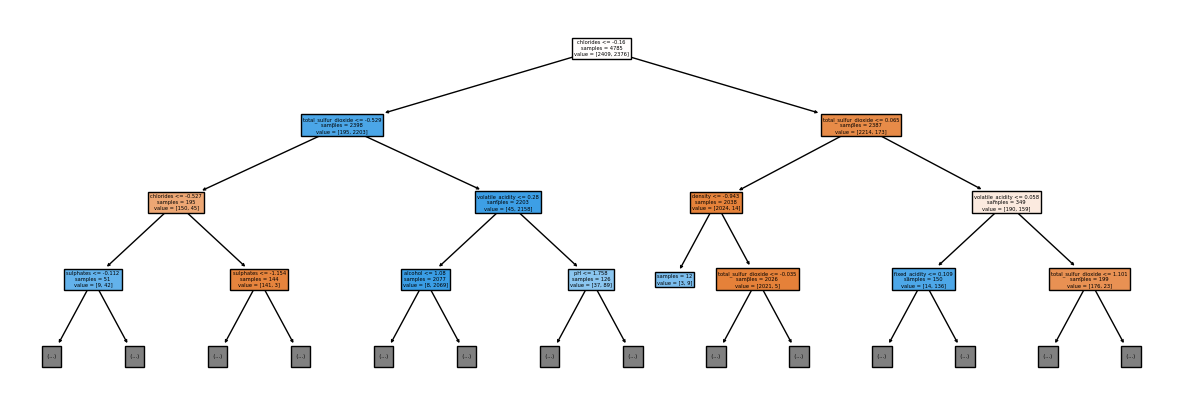

In [95]:
# tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 150)
# tree.fit(X, y)
# plt.figure(figsize = (15, 5))
# plot_tree(tree, filled=True, proportion = False, impurity = False, feature_names=list(X_tr.columns))
# plt.show();

plt.figure(figsize = (15, 5))
plot_tree(grid.best_estimator_, max_depth = 3, filled=True,
          proportion = False, impurity = False, feature_names=list(X_tr.columns))
plt.show();

In [96]:
# ROC score
roc_auc_score(y_ts, dtc_y_pred)

0.9886810452567963

In [97]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[ 991,   18],
       [   5, 1037]], dtype=int64)

In [98]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9887859580692345


In [99]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1009
           1       0.98      1.00      0.99      1042

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [100]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.989031950405341

# Testar o modelo com dados da base df_validation

In [101]:
validation = list(y_val[400:440].values)
print(validation)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [102]:
prediction = list(grid.predict(X_val_padronizado[400:440]))
print(prediction)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]


In [103]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])    
    display (dfp)
#     display (dfp.prediction.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

seq  validation  prediction
0    6           1           0
1    7           1           0
2   13           1           0
3   15           1           0
4   27           1           0
5   36           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [104]:
# Treinar o modelo
lr = LogisticRegression(random_state=0, max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500, random_state=0)

In [105]:
lr_y_pred = lr.predict(X_ts)

In [106]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1005,    4],
       [   7, 1035]], dtype=int64)

In [107]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9946367625548513


In [108]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1009
           1       1.00      0.99      0.99      1042

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [109]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9947140797693416

In [110]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[1, 1, 0, 1, 1, 0, 1, 1, 1, 0]


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [111]:
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [112]:
rf_y_pred = lr.predict(X_ts)

In [113]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[1005,    4],
       [   7, 1035]], dtype=int64)

In [114]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9946367625548513


In [115]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1009
           1       1.00      0.99      0.99      1042

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [116]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9947140797693416

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            neural network MLPClassifier
        </b>
    <br/>&nbsp;
</center>

[sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification)

In [131]:
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}
mlpc = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,        
        early_stopping=True,
    ),
    params,
    cv=2,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)
mlpc.fit(X_tr,y_tr)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


GridSearchCV(cv=2, estimator=MLPClassifier(batch_size=256, early_stopping=True),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [143]:
mlpc_y_pred = mlpc.predict(X_ts)
mlpc_y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [150]:
# MATRIZ CONFUSÃO
mlpc_confusion_matrix = confusion_matrix(y_ts, mlpc_y_pred)
mlpc_confusion_matrix

array([[1005,    4],
       [   5, 1037]], dtype=int64)

In [144]:
# ACURÁCIA
mlpc_acuracia = accuracy_score(y_ts, mlpc_y_pred)
print("Acurácia:", mlpc_acuracia)

Acurácia: 0.9956118966357874


In [145]:
mlpc_f1_score = f1_score(y_ts, mlpc_y_pred)
mlpc_f1_score

0.9956793086893903

In [154]:
etc_f1_score > mlpc_f1_score

True

In [132]:
mlpc.best_params_

{'alpha': 5.994842503189409e-06,
 'hidden_layer_sizes': (70, 100),
 'learning_rate_init': 0.03593813663804626}

In [133]:
roc_auc_score(y_ts, mlpc.predict_proba(X_ts)[:,1])

0.998762576352178

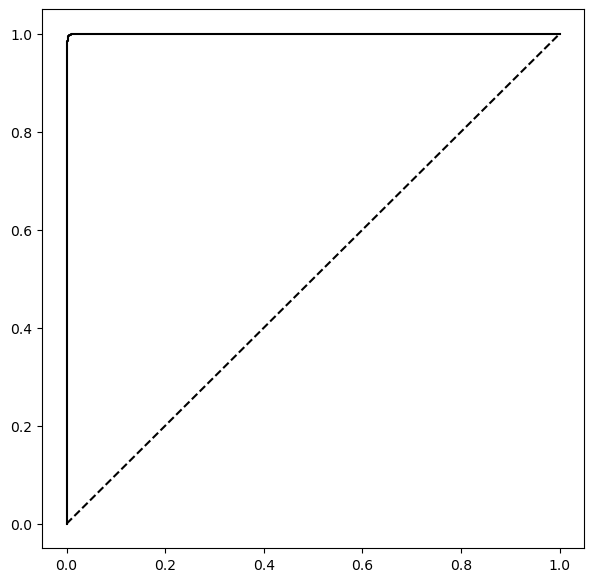

In [140]:
fpr, tpr, ths = roc_curve(y_ts, mlpc.predict_proba(X_ts)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--');

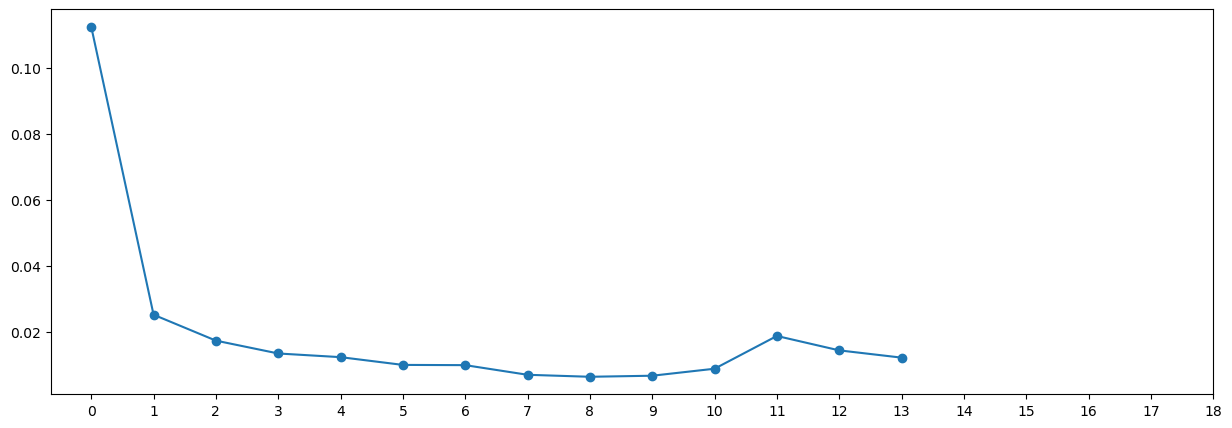

In [138]:
loss = mlpc.best_estimator_.loss_curve_
plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(19));

In [134]:
validation = list(y_val[400:440].values)
print(validation)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [135]:
prediction = list(mlpc.predict(X_val_padronizado[400:440]))
print(prediction)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [136]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])    
    display (dfp)
#     display (dfp.prediction.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

O modelo previu corretamente os resultados em relação a variável "y"
[]


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Avaliação geral dos modelos utilizados
        </b>
    <br/>&nbsp;
</center>

In [148]:
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier', 'Neural Network MLPC'],
    'acurácia':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia, mlpc_acuracia],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score, mlpc_f1_score]
    }    
modelos = pd.DataFrame(dfm)

# modelos.sort_values('f1_score', ascending=False)
modelos.style.highlight_max(subset=['acurácia','f1_score'])